# Anomaly-training with `tslearn`

**Note**: We make use of the `SyntheticTS` class from the `timeseries` module/script for this demo. Please make sure to copy it (in this directory) before running this Notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from timeseries import SyntheticTS
from tslearn.utils import to_time_series
from tslearn.neural_network import TimeSeriesMLPClassifier

In [2]:
start_time = '2021-05-01 00:00:00'
end_time = '2021-05-06 06:00:00'
process_time_mins = 15

ts1 = SyntheticTS(start_time,end_time,process_time_mins)

## Variance classification

In [3]:
X_train = []
for i in range(20):
    scale = np.random.randint(5,10)*0.1
    df1=ts1.normal_process(loc=10.0,scale=scale,return_df=True)
    ts2=to_time_series(df1['normal_data'])
    X_train.append(ts2)
    
    scale = np.random.randint(15,20)*0.1
    df1=ts1.normal_process(loc=10.0,scale=scale,return_df=True)
    ts2=to_time_series(df1['normal_data'])
    X_train.append(ts2)
    
    scale = np.random.randint(25,40)*0.1
    df1=ts1.normal_process(loc=10.0,scale=scale,return_df=True)
    ts2=to_time_series(df1['normal_data'])
    X_train.append(ts2)
    
X_train = np.array(X_train)

In [4]:
X_train.shape

(60, 504, 1)

In [5]:
y_train = [0,1,2]*20
y_train = np.array(y_train)

In [6]:
y_train

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2])

In [7]:
mlp = TimeSeriesMLPClassifier(hidden_layer_sizes=(64, 64),random_state=0,max_iter=200)

In [8]:
mlp.fit(X_train,y_train)

c:\program files\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


TimeSeriesMLPClassifier(hidden_layer_sizes=(64, 64), random_state=0)

In [9]:
mlp.score(X_train,y_train)

1.0

In [10]:
def random_test():
    idx = np.random.randint(0,60)
    tslength = len(X_train[idx])
    plt.figure(figsize=(15,4))
    plt.scatter(np.arange(tslength),X_train[idx])
    plt.ylim(5,20)
    plt.show()
    d1 = X_train[idx].reshape(1,-1,1)
    classid=int(mlp.predict(d1))
    if classid==0:
        print("Time series class: 'Low variance'")
    if classid==1:
        print("Time series class: 'Medium variance'")
    if classid==2:
        print("Time series class: 'High variance'")

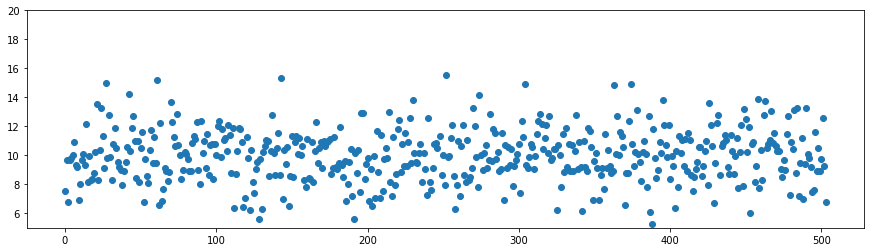

Time series class: 'Medium variance'


In [16]:
random_test()

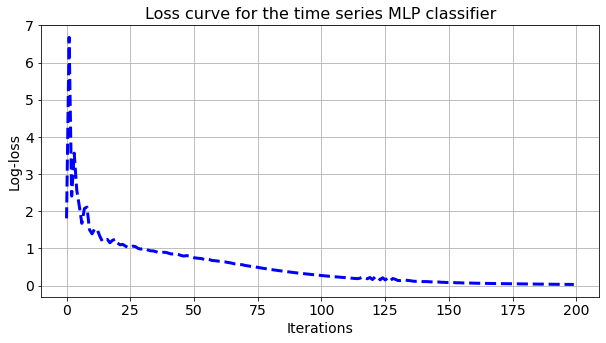

In [55]:
plt.figure(figsize=(10,5))
plt.title("Loss curve for the time series MLP classifier",fontsize=16)
plt.plot(mlp.loss_curve_,color='blue',linestyle='--',linewidth=3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Iterations",fontsize=14)
plt.ylabel("Log-loss",fontsize=14)
plt.grid(True)
plt.show()

## Anomaly fraction classification

In [17]:
X_train = []
for i in range(20):
    frac = np.random.randint(1,10)*0.01
    _=ts1.normal_process(loc=10.0,scale=scale,return_df=True)
    df1 = ts1.anomalize(anomaly_frac=frac)
    ts2=to_time_series(df1['anomaly_data'])
    X_train.append(ts2)
    
    frac = np.random.randint(10,25)*0.01
    _=ts1.normal_process(loc=10.0,scale=scale,return_df=True)
    df1 = ts1.anomalize(anomaly_frac=frac)
    ts2=to_time_series(df1['anomaly_data'])
    X_train.append(ts2)
    
    frac = np.random.randint(25,40)*0.01
    _=ts1.normal_process(loc=10.0,scale=scale,return_df=True)
    df1 = ts1.anomalize(anomaly_frac=frac)
    ts2=to_time_series(df1['anomaly_data'])
    X_train.append(ts2)
    
X_train = np.array(X_train)

y_train = [0,1,2]*20
y_train = np.array(y_train)

In [18]:
mlp_frac = TimeSeriesMLPClassifier(hidden_layer_sizes=(64, 64),random_state=0,max_iter=200)
mlp_frac.fit(X_train,y_train)

TimeSeriesMLPClassifier(hidden_layer_sizes=(64, 64), random_state=0)

In [19]:
mlp_frac.score(X_train,y_train)

1.0

In [20]:
def random_test_frac():
    idx = np.random.randint(0,60)
    tslength = len(X_train[idx])
    plt.figure(figsize=(15,4))
    plt.scatter(np.arange(tslength),X_train[idx])
    #plt.ylim(5,20)
    plt.show()
    d1 = X_train[idx].reshape(1,-1,1)
    classid=int(mlp_frac.predict(d1))
    if classid==0:
        print("Time series class: 'Low anomaly fraction'")
    if classid==1:
        print("Time series class: 'Medium anomaly fraction'")
    if classid==2:
        print("Time series class: 'High anomaly fraction'")

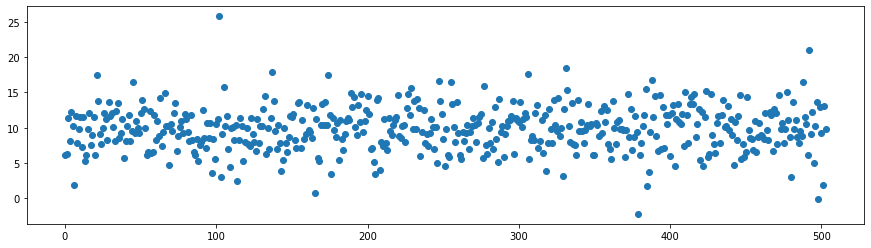

Time series class: 'Low anomaly fraction'


In [28]:
random_test_frac()

## Anomaly scale (magnitude) classification

In [29]:
X_train = []
for i in range(20):
    scale = np.random.randint(1,10)*0.1
    _=ts1.normal_process(loc=10.0,scale=scale,return_df=True)
    df1 = ts1.anomalize(anomaly_frac=0.05,anomaly_scale=scale)
    ts2=to_time_series(df1['anomaly_data'])
    X_train.append(ts2)
    
    scale = np.random.randint(10,25)*0.1
    _=ts1.normal_process(loc=10.0,scale=scale,return_df=True)
    df1 = ts1.anomalize(anomaly_frac=0.05,anomaly_scale=scale)
    ts2=to_time_series(df1['anomaly_data'])
    X_train.append(ts2)
    
    scale = np.random.randint(25,40)*0.1
    _=ts1.normal_process(loc=10.0,scale=scale,return_df=True)
    df1 = ts1.anomalize(anomaly_frac=0.05,anomaly_scale=scale)
    ts2=to_time_series(df1['anomaly_data'])
    X_train.append(ts2)
    
X_train = np.array(X_train)

y_train = [0,1,2]*20
y_train = np.array(y_train)

In [30]:
mlp_scale = TimeSeriesMLPClassifier(hidden_layer_sizes=(64, 64),random_state=0,max_iter=200)
mlp_scale.fit(X_train,y_train)

TimeSeriesMLPClassifier(hidden_layer_sizes=(64, 64), random_state=0)

In [31]:
mlp_scale.score(X_train,y_train)

1.0

In [32]:
def random_test_scale():
    idx = np.random.randint(0,60)
    tslength = len(X_train[idx])
    plt.figure(figsize=(15,4))
    plt.scatter(np.arange(tslength),X_train[idx])
    #plt.ylim(5,20)
    plt.show()
    d1 = X_train[idx].reshape(1,-1,1)
    classid=int(mlp_scale.predict(d1))
    if classid==0:
        print("Time series class: 'Low anomaly magnitude'")
    if classid==1:
        print("Time series class: 'Medium anomaly magnitude'")
    if classid==2:
        print("Time series class: 'High anomaly magnitude'")

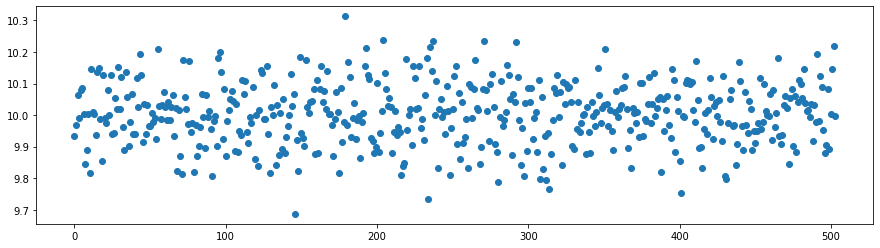

Time series class: 'Low anomaly magnitude'


In [39]:
random_test_scale()

## Positive or negative shifts

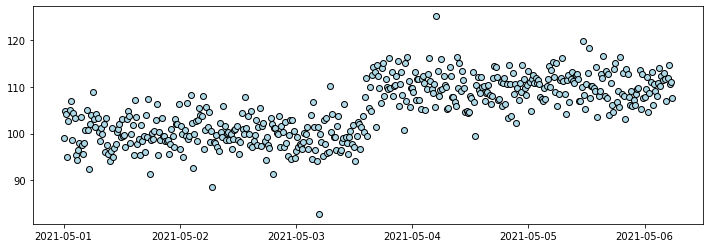

In [56]:
ts1 = SyntheticTS(start_time,end_time,process_time_mins)
_=ts1.normal_process(loc=100.0,scale=scale,return_df=True)
_ = ts1.anomalize()
drifted=ts1.drift(pct_drift_mean=10)
ts1.plot_drifted()
time_drift='2021-05-04 12:00:00'

In [57]:
drifted.columns

Index(['time', 'drifted_data'], dtype='object')

In [58]:
start_time = '2021-05-01 00:00:00'
end_time = '2021-05-06 23:00:00'
process_time_mins = 15
ts1 = SyntheticTS(start_time,end_time,process_time_mins)

In [60]:
X_train = []
for i in range(500):
    # random day
    d = '2021-05-0'+str(np.random.choice([1,2,3]))
    # random hour
    t = str(np.random.randint(0,24))+':'+np.random.choice(['00','15','30','45'])+':00'
    if len(t)==7:
        t1 = '0'+t
        drift_time = d+' '+t1
    else:
        drift_time = d+' '+t
    neg_drift = np.random.randint(-25,-5)
    _=ts1.normal_process(loc=100.0,scale=scale,return_df=True)
    _ = ts1.anomalize(anomaly_frac=0.05)
    df1 = ts1.drift(pct_drift_mean=neg_drift,time_drift=drift_time)
    ts2=to_time_series(df1['drifted_data'])
    X_train.append(ts2)
    
    d = '2021-05-0'+str(np.random.choice([1,2,3]))
    # random hour
    t = str(np.random.randint(0,24))+':'+np.random.choice(['00','15','30','45'])+':00'
    if len(t)==7:
        t1 = '0'+t
        drift_time = d+' '+t1
    else:
        drift_time = d+' '+t
    pos_drift = np.random.randint(5,25)
    _=ts1.normal_process(loc=100.0,scale=scale,return_df=True)
    _ = ts1.anomalize(anomaly_frac=0.05)
    df1 = ts1.drift(pct_drift_mean=pos_drift,time_drift=drift_time)
    ts2=to_time_series(df1['drifted_data'])
    X_train.append(ts2)
    
    d = '2021-05-0'+str(np.random.choice([4,5,6]))
    # random hour
    t = str(np.random.randint(0,24))+':'+np.random.choice(['00','15','30','45'])+':00'
    if len(t)==7:
        t1 = '0'+t
        drift_time = d+' '+t1
    else:
        drift_time = d+' '+t
    neg_drift = np.random.randint(-25,-5)
    _=ts1.normal_process(loc=100.0,scale=scale,return_df=True)
    _ = ts1.anomalize(anomaly_frac=0.05)
    df1 = ts1.drift(pct_drift_mean=neg_drift,time_drift=drift_time)
    ts2=to_time_series(df1['drifted_data'])
    X_train.append(ts2)
    
    d = '2021-05-0'+str(np.random.choice([4,5,6]))
    # random hour
    t = str(np.random.randint(0,24))+':'+np.random.choice(['00','15','30','45'])+':00'
    if len(t)==7:
        t1 = '0'+t
        drift_time = d+' '+t1
    else:
        drift_time = d+' '+t
    pos_drift = np.random.randint(5,25)
    _=ts1.normal_process(loc=100.0,scale=scale,return_df=True)
    _ = ts1.anomalize(anomaly_frac=0.05)
    df1 = ts1.drift(pct_drift_mean=pos_drift,time_drift=drift_time)
    ts2=to_time_series(df1['drifted_data'])
    X_train.append(ts2)
    
X_train = np.array(X_train)

y_train = [0,1,2,3]*500
y_train = np.array(y_train)

In [61]:
mlp_drift = TimeSeriesMLPClassifier(hidden_layer_sizes=(200,200),random_state=0,max_iter=200)
mlp_drift.fit(X_train,y_train)

TimeSeriesMLPClassifier(hidden_layer_sizes=(200, 200), random_state=0)

In [62]:
mlp_drift.score(X_train,y_train)

0.929

In [63]:
def random_test_drift():
    idx = np.random.randint(0,80)
    tslength = len(X_train[idx])
    plt.figure(figsize=(15,4))
    plt.scatter(np.arange(tslength),X_train[idx])
    #plt.ylim(5,20)
    plt.show()
    d1 = X_train[idx].reshape(1,-1,1)
    classid=int(mlp_drift.predict(d1))
    if classid==0:
        print("Time series class: 'Early negative drift'")
    if classid==1:
        print("Time series class: 'Early positive drift'")
    if classid==2:
        print("Time series class: 'Late negative drift'")
    if classid==3:
        print("Time series class: 'Late positive drift'")

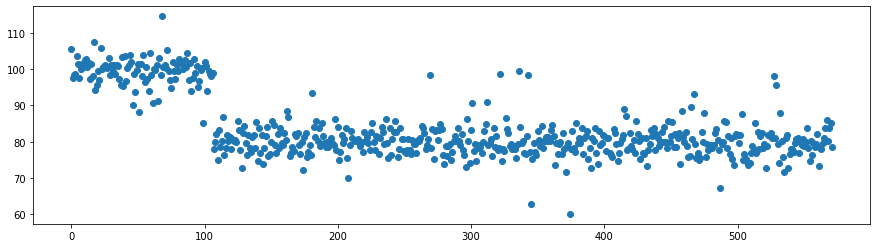

Time series class: 'Early negative drift'


In [69]:
random_test_drift()